#ANÁLISIS EXPLORATORIO
A partir del conjunto de datos de entrenamiento (**train.csv**)

In [1]:
import pandas as pd
import numpy as np
z=pd.read_csv('train.csv')
print("el conjunto de datos de entrenamiento está conformado por",z.shape[0],"observaciones o muestras cada una de",z.shape[1],"atributos")

el conjunto de datos de entrenamiento está conformado por 692500 observaciones o muestras cada una de 21 atributos


In [ ]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


CONTEO DE OCURRENCIAS POR PROGRAMA ACADÉMICO Y DEPARTAMENTO DE ORIGEN.


In [ ]:
E_PROG_DPTO = z.groupby(['E_PRGM_DEPARTAMENTO', 'E_PRGM_ACADEMICO']).size().reset_index(name='NÚMERO DE ESTUDIANTES')
E_PROG_DPTO = E_PROG_DPTO.sort_values(by='NÚMERO DE ESTUDIANTES', ascending=False)
display(E_PROG_DPTO)

,E_PRGM_DEPARTAMENTO,E_PRGM_ACADEMICO,NÚMERO DE ESTUDIANTES
465,BOGOTÁ,ADMINISTRACION DE EMPRESAS,21468
494,BOGOTÁ,ADMINISTRACIÓN DE EMPRESAS,19639
575,BOGOTÁ,DERECHO,13051
894,BOGOTÁ,PSICOLOGIA,12668
895,BOGOTÁ,PSICOLOGÍA,12293
...,...,...,...
1469,CUNDINAMARCA,LICENCIATURA EN EDUCACION BASICA CON ENFASIS E...,1
340,ATLANTICO,ADMINISTRACION PUBLICA,1
1794,NORTE SANTANDER,LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y ...,1
1800,NORTE SANTANDER,LICENCIATURA EN MATEMATICAS E INFORMATICA,1


CONTEO DE OCURRENCIAS POR ESTRATO SOCIOECONÓMICO.

In [ ]:
E_ESTRATO = z.groupby(['F_ESTRATOVIVIENDA']).size().reset_index(name='NÚMERO DE ESTUDIANTES')
E_ESTRATO = E_ESTRATO.sort_values(by='NÚMERO DE ESTUDIANTES', ascending=False)
display(E_ESTRATO)

,F_ESTRATOVIVIENDA,NÚMERO DE ESTUDIANTES
1,Estrato 2,232671
2,Estrato 3,210685
0,Estrato 1,111991
3,Estrato 4,65514
4,Estrato 5,23608
5,Estrato 6,12605
6,Sin Estrato,3289


CONTEO DE OCURRENCIAS POR RENDIMIENTO GLOBAL.


<Axes: xlabel='RENDIMIENTO_GLOBAL'>

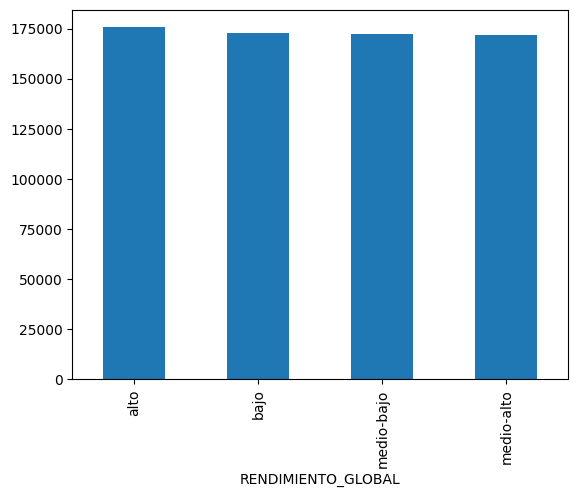

In [ ]:
z.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')

SUBMODELO: DEPARTAMENTO DE ORIGEN, PROGRAMA ACADÉMICO, ESTRATO SOCIOECONÓMICO Y RENDIMIENTO.

In [ ]:
z1 = z[['E_PRGM_DEPARTAMENTO', 'E_PRGM_ACADEMICO', 'F_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]
z1.head()

,E_PRGM_DEPARTAMENTO,E_PRGM_ACADEMICO,F_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,BOGOTÁ,ENFERMERIA,Estrato 3,medio-alto
1,ATLANTICO,DERECHO,Estrato 3,bajo
2,BOGOTÁ,MERCADEO Y PUBLICIDAD,Estrato 3,bajo
3,SANTANDER,ADMINISTRACION DE EMPRESAS,Estrato 4,alto
4,ANTIOQUIA,PSICOLOGIA,Estrato 3,medio-bajo


<Axes: xlabel='RENDIMIENTO_GLOBAL'>

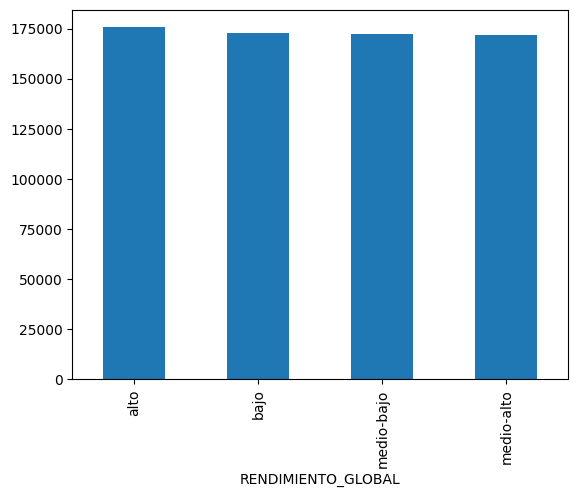

In [ ]:
z1.RENDIMIENTO_GLOBAL.value_counts().plot(kind='bar')